<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/TinySOL/training1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/TinySOL1s/features.csv',header=None)

In [4]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/TinySOL1s/labels.csv', header=None)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

## **Logistic Regression**

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [8]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

LogisticRegression(max_iter=10000)

In [9]:
y_pre_lg = log_reg_mod.predict(X_test)

In [10]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

   Accordion       0.98      0.99      0.99       199
   Bass_Tuba       1.00      0.94      0.97        36
     Bassoon       0.97      1.00      0.99        37
 Clarinet_Bb       0.95      1.00      0.97        37
  Contrabass       0.96      1.00      0.98        99
       Flute       1.00      1.00      1.00        36
        Horn       0.91      0.95      0.93        43
        Oboe       1.00      0.90      0.95        30
    Sax_Alto       0.96      0.96      0.96        23
    Trombone       0.92      0.82      0.87        40
   Trumpet_C       0.91      0.97      0.94        33
       Viola       0.98      0.98      0.98        91
      Violin       1.00      0.96      0.98        76
 Violoncello       0.98      0.96      0.97        94

    accuracy                           0.97       874
   macro avg       0.97      0.96      0.96       874
weighted avg       0.97      0.97      0.97       874



In [12]:
lab = y[0].unique()

In [13]:
lab.sort()

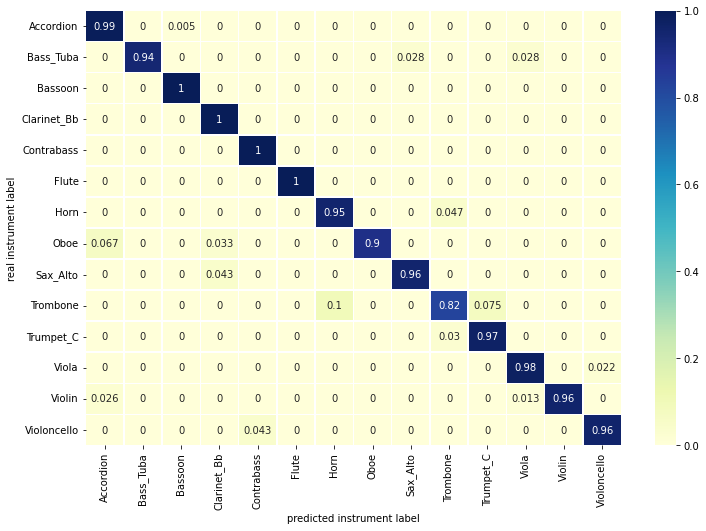

In [15]:
cm2 = confusion_matrix(y_test, y_pre_lg, normalize='true')
cm2 = pd.DataFrame(cm2, index=lab, columns=lab)
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True, linewidths=.5, cmap="YlGnBu")
plt.xlabel("predicted instrument label")
plt.ylabel("real instrument label")
plt.show()